In [126]:
import pandas as pd

In [127]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'


In [128]:
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [129]:
#drop two first columns , unneessary
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace = True)

In [130]:
df = df._get_numeric_data()
df.head()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
0,4,2,1,5,14.0,0.551724,8,256,3.52800,978,0,1
1,3,1,1,3,15.6,0.689655,4,256,4.85100,634,1,0
2,3,1,1,7,15.6,0.931034,8,256,4.85100,946,1,0
3,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,0,1
4,4,2,1,7,15.6,0.620690,8,256,4.21155,837,1,0


In [131]:
df.head()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
0,4,2,1,5,14.0,0.551724,8,256,3.52800,978,0,1
1,3,1,1,3,15.6,0.689655,4,256,4.85100,634,1,0
2,3,1,1,7,15.6,0.931034,8,256,4.85100,946,1,0
3,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,0,1
4,4,2,1,7,15.6,0.620690,8,256,4.21155,837,1,0


In [132]:
x_data = df.drop('Price', axis = 1)
y_data = df['Price']

In [133]:
x_data.head()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Screen-Full_HD,Screen-IPS_panel
0,4,2,1,5,14.0,0.551724,8,256,3.52800,0,1
1,3,1,1,3,15.6,0.689655,4,256,4.85100,1,0
2,3,1,1,7,15.6,0.931034,8,256,4.85100,1,0
3,4,2,1,5,13.3,0.551724,8,128,2.69010,0,1
4,4,2,1,7,15.6,0.620690,8,256,4.21155,1,0


In [134]:
y_data.head()

,Price
0,978
1,634
2,946
3,1244
4,837


In [135]:
# split the data into training and testing set: 90:10

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 1)

In [136]:
print(df.shape)
print(x_data.shape)
print(y_data.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(238, 12)
(238, 11)
(238,)
(166, 11)
(166,)
(72, 11)
(72,)


In [167]:
#single variable linear regression model

from sklearn.linear_model import LinearRegression, Ridge

lm = LinearRegression()
lm.fit(x_train[['CPU_frequency']], y_train)


LinearRegression()

In [138]:
lm.score(x_train[['CPU_frequency']], y_train)

0.1741513805090481

In [139]:
lm.score(x_test[['CPU_frequency']], y_test)

-0.032648804536480336

Using "Storage_GB_SSD" to prdict the 'price'

In [140]:
lm.fit(x_train[['Storage_GB_SSD']], y_train)

LinearRegression()

In [141]:
lm.score(x_train[['Storage_GB_SSD']], y_train)

0.0507399365782365

In [142]:
lm.score(x_test[['Storage_GB_SSD']], y_test)

0.07271976159766524

In [143]:
df.corr()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
Category,1.000000,-0.114174,-0.043378,0.232425,-0.285392,-0.053414,0.030127,0.038246,-0.381032,0.286243,-0.117608,0.117608
GPU,-0.114174,1.000000,-0.199549,0.145388,0.154251,0.291439,0.218973,0.094288,0.262853,0.288298,-0.089582,0.089582
OS,-0.043378,-0.199549,1.000000,0.016954,0.146695,0.050407,-0.074625,0.007751,0.120858,-0.221730,0.172891,-0.172891
CPU_core,0.232425,0.145388,0.016954,1.000000,0.041092,0.242722,0.473075,0.400015,0.068599,0.459398,0.003837,-0.003837
Screen_Size_inch,-0.285392,0.154251,0.146695,0.041092,1.000000,-0.000948,0.018194,0.119699,0.797534,-0.110644,0.342912,-0.342912
CPU_frequency,-0.053414,0.291439,0.050407,0.242722,-0.000948,1.000000,0.226736,0.035557,0.066522,0.366666,0.055273,-0.055273
RAM_GB,0.030127,0.218973,-0.074625,0.473075,0.018194,0.226736,1.000000,0.361469,0.055068,0.549297,0.017913,-0.017913
Storage_GB_SSD,0.038246,0.094288,0.007751,0.400015,0.119699,0.035557,0.361469,1.000000,0.112519,0.243421,0.061402,-0.061402
Weight_pounds,-0.381032,0.262853,0.120858,0.068599,0.797534,0.066522,0.055068,0.112519,1.000000,-0.050312,0.117909,-0.117909
Price,0.286243,0.288298,-0.221730,0.459398,-0.110644,0.366666,0.549297,0.243421,-0.050312,1.000000,-0.021075,0.021075


In [144]:
lm.fit(x_train[['RAM_GB']], y_train)

LinearRegression()

In [145]:
lm.score(x_train[['RAM_GB']], y_train)

0.261310662399571

In [146]:
lm.score(x_test[['RAM_GB']], y_test)

0.4234248192606157

In [147]:
# cross validation
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lm, x_data[['RAM_GB']], y_data, cv = 4)

In [148]:
Rcross


array([-0.60627261,  0.38699275,  0.26498315, -0.00759838])

In [149]:
print("the mean of folds are: ", Rcross.mean())

the mean of folds are:  0.00952622830225075


In [150]:
print("the standard deviation is:", Rcross.std())

the standard deviation is: 0.3831581534199184


In [151]:
Rcross = cross_val_score(lm, x_data[['CPU_frequency']], y_data, cv = 4)

In [152]:
Rcross.mean()

-0.16109232388595113

In [153]:
Rcross.std()

0.384957978666471

The above all the models performs are not good estimates and underfiting.

# Task 2: Overfiting

- to identify point of overfiting model:

* Create a polynomial features using the single attribute
* evaluate R2 scores of the model created using different degress of polynomial feature ranging from 1 to 5.

In [154]:
# split data into 50%

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.50, random_state = 1)

In [155]:
print(x_data.shape)
print(y_data.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(238, 11)
(238,)
(119, 11)
(119, 11)
(119,)
(119,)


In [158]:
# Import the necessary class from sklearn
from sklearn.preprocessing import PolynomialFeatures

#create a polynomial features
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
  pr = PolynomialFeatures(degree = n)
  x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
  x_test_pr = pr.fit_transform(x_test[['CPU_frequency']]) #typo here: should be CPU_frequency
  lm.fit(x_train_pr, y_train)
  Rsqu_test.append(lm.score(x_test_pr, y_test))

Text(0.5, 1.0, 'R^2 using Test DAta')

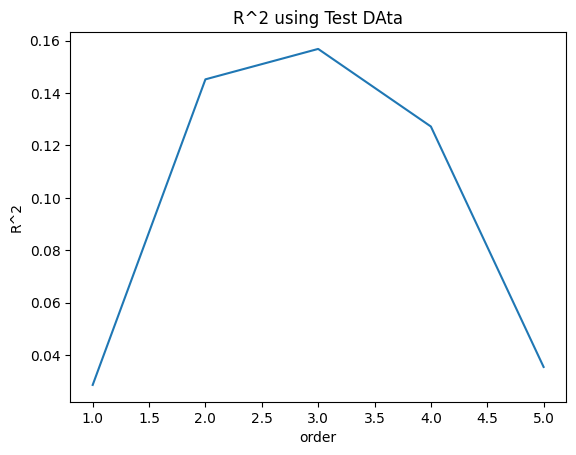

In [159]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 using Test DAta')

In [160]:
Rsqu_test

[0.02861941172016369,
 0.1452088332330489,
 0.156816053302391,
 0.12721267717783258,
 0.03547064602496264]

# Task 3: Ridge Regression

consider multiple features: 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS',  'GPU' and 'Category'.



In [162]:
# crating a polynomial Features using all above parameters with degree =2.

pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU','Category']])
x_test_pr = pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU','Category']])


In [169]:
# Create a Ridge Regression model and evaluate using values of the hypterparamete alpha ranging from 0.001 to 1 with increments of 0.001.
# Create a list of all Ridge Regression R2 scores for training and testing data.
from tqdm import tqdm
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001, 1, 0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
  RidgeModel = Ridge(alpha = alpha)
  RidgeModel.fit(x_train_pr, y_train)
  test_score, train_score = RidgeModel.score(x_test_pr, y_test), RidgeModel.score(x_train_pr, y_train)
  pbar.set_postfix({'test_score': test_score, 'train_score': train_score})
  Rsqu_test.append(test_score)
  Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:10<00:00, 95.49it/s, test_score=0.507, train_score=0.642] 


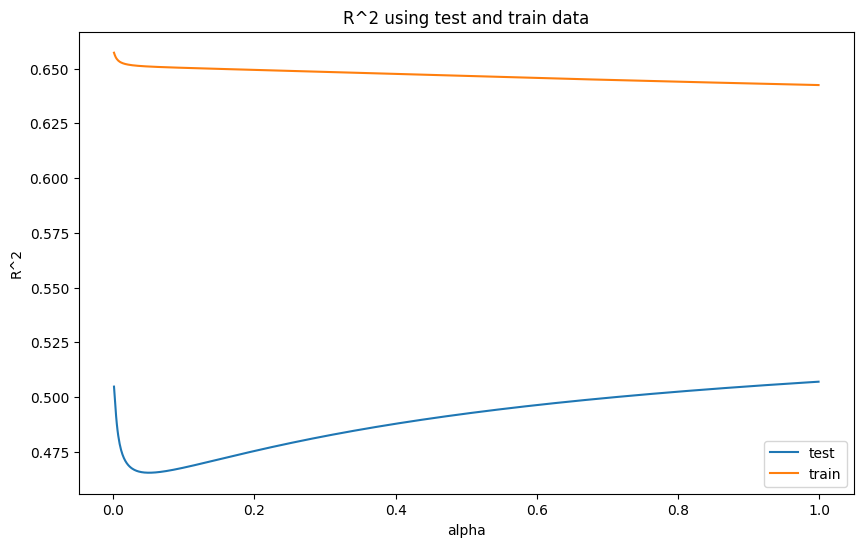

In [170]:
#plot r@ for training and testing sets with respect to the value of alpha
plt.figure(figsize = (10,6))
plt.plot(Alpha, Rsqu_test, label = 'test')
plt.plot(Alpha, Rsqu_train, label = 'train')
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.title("R^2 using test and train data")
plt.legend()